# 10 Academy: Artificial Intelligence Mastery
#### Week 8 and 9 Challenges  
#### Project: Improved detection of fraud cases for e-commerce and bank transactions
##### Hyperparameter Tuning and Model Explainability
Ethel.C

Based on our previous analysis of model building, training, and selection, the Random Forest model demonstrated superior performance on both the fraud dataset (e-commerce) and the credit card dataset (bank transactions). As a result, Random Forest has been chosen for hyperparameter tuning, model interpretation, and deployment

In [1]:
import sys
import pandas as pd
scripts_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\scripts'
src_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\src'
# Load the datasets
creditcard_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_credit_Data.csv")
fraud_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv")
fraud_data = fraud_data.drop(columns=['device_id', 'ip_address'])
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)

### Hyperparameter Tuning for RandomForest and Saving the best Model as .pkl


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from hyperparameter_tuning import hyperparameter_tuning,evaluate_models, explain_model_with_shap,explain_model_with_lime
    

In [3]:
# Separate features and target
X_credit = creditcard_data.drop(columns=['Class'])
y_credit = creditcard_data['Class']

X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']

# Split data for Credit Card Fraud detection
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(
    X_credit, y_credit, test_size=0.3, random_state=42, stratify=y_credit
)
print(f"Credit Card Fraud Data Split:")
print(f"Training data size: {X_credit_train.shape[0]} samples")
print(f"Test data size: {X_credit_test.shape[0]} samples")

# Split data for Fraud Detection
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud
)
print(f"\nFraud Detection Data Split:")
print(f"Training data size: {X_fraud_train.shape[0]} samples")
print(f"Test data size: {X_fraud_test.shape[0]} samples")


Credit Card Fraud Data Split:
Training data size: 199364 samples
Test data size: 85443 samples

Fraud Detection Data Split:
Training data size: 105778 samples
Test data size: 45334 samples



Tuning and Evaluating RandomForest for Fraud Detection
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for RandomForest on Fraud Detection:  {'bootstrap': True, 'max_depth': 10, 'n_estimators': 200}

RandomForest Performance on Fraud Detection Test Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     41089
           1       0.94      0.53      0.68      4245

    accuracy                           0.95     45334
   macro avg       0.95      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334

ROC-AUC Score: 0.7655884819648439


Model saved as Fraud Detection_RandomForest_best_model.pkl


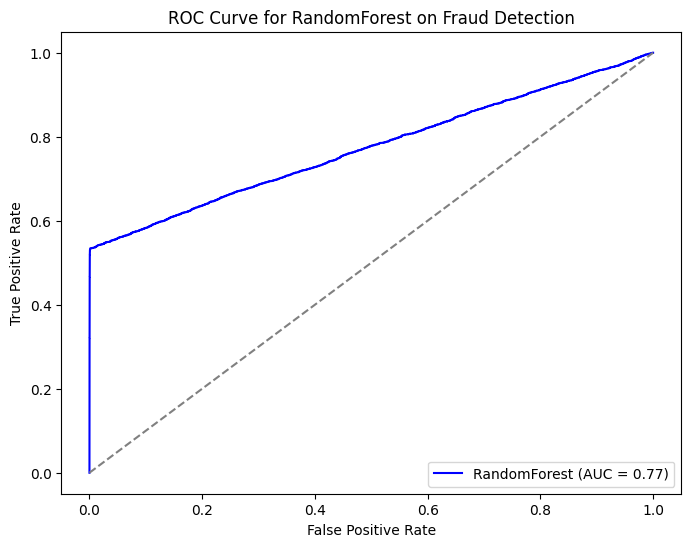


Tuning and Evaluating RandomForest for Credit Card Fraud
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for RandomForest on Credit Card Fraud:  {'bootstrap': False, 'max_depth': 20, 'n_estimators': 200}

RandomForest Performance on Credit Card Fraud Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8817333087234606


Model saved as Credit Card Fraud_RandomForest_best_model.pkl


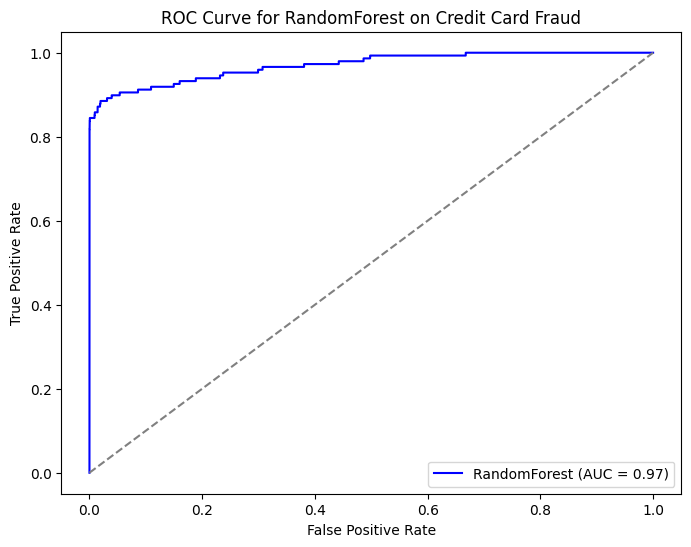

In [4]:
# Scale data
scaler = StandardScaler()
X_credit_train_scaled = scaler.fit_transform(X_credit_train)
X_credit_test_scaled = scaler.transform(X_credit_test)

X_fraud_train_scaled = scaler.fit_transform(X_fraud_train)
X_fraud_test_scaled = scaler.transform(X_fraud_test)
models = {
    "RandomForest": hyperparameter_tuning,
}

# Evaluate the models
best_fraud_model = evaluate_models(models, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "Fraud Detection")
best_credit_model = evaluate_models(models, X_credit_train, y_credit_train, X_credit_test, y_credit_test, "Credit Card Fraud")

### Model Explainability

In [ ]:
# Explain Models
explain_model_with_shap(best_fraud_model, X_fraud_train, "Fraud Detection")
explain_model_with_shap(best_credit_model, X_credit_train, "Credit Card Fraud")

explain_model_with_lime(best_fraud_model, X_fraud_train, y_fraud_train, "Fraud Detection")
explain_model_with_lime(best_credit_model, X_credit_train, y_credit_train, "Credit Card Fraud")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.